<a href="https://colab.research.google.com/github/Dhatritippireddy/-IncludeHer-Projects/blob/master/mockup_june.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python-headless numpy


Upload your design image:


Saving butterfly.jpg to butterfly.jpg
Select clothing type (shirt, tshirt, croptop, pants, shorts):
shirt


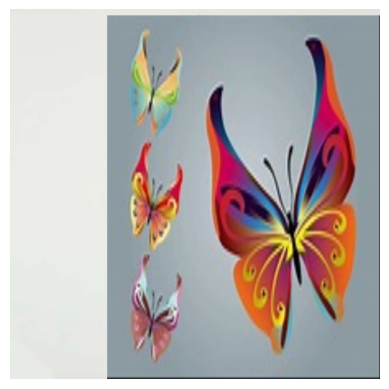

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image

# Clothing mockup paths (upload your own mockups to Colab first)
MOCKUPS = {
    'shirt': '/content/shirt',
    'tshirt': '/content/tshirt',
    'croptop': '/content/croptop',
    'pants': '/content/pants_mockup.jpg',
    'shorts': '/content/shorts'
}

def load_image(path):
    img = cv2.imread(path)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def auto_warp(design, mockup):
    # Find dominant garment area (simple threshold method)
    gray = cv2.cvtColor(mockup, cv2.COLOR_RGB2GRAY)
    _, mask = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)

    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        return None

    # Get largest contour
    cnt = max(contours, key=cv2.contourArea)
    x,y,w,h = cv2.boundingRect(cnt)

    # Warp design to fit bounding box
    h_design, w_design = design.shape[:2]
    src_pts = np.float32([[0,0], [0,h_design], [w_design,h_design], [w_design,0]])
    dst_pts = np.float32([[x,y], [x,y+h], [x+w,y+h], [x+w,y]])

    M = cv2.getPerspectiveTransform(src_pts, dst_pts)
    warped = cv2.warpPerspective(design, M, (mockup.shape[1], mockup.shape[0]))

    # Create mask
    mask = np.zeros_like(mockup)
    cv2.fillConvexPoly(mask, dst_pts.astype(int), (255,255,255))
    mask = cv2.cvtColor(mask, cv2.COLOR_RGB2GRAY)

    return warped, mask

def apply_design(design_path, clothing_type):
    # Load images
    design = load_image(design_path)
    mockup = load_image(MOCKUPS[clothing_type])

    # Warp design to clothing
    warped, mask = auto_warp(design, mockup)
    if warped is None:
        print("Couldn't detect clothing area")
        return None

    # Blend with mockup
    inv_mask = cv2.bitwise_not(mask)
    background = cv2.bitwise_and(mockup, mockup, mask=inv_mask)
    foreground = cv2.bitwise_and(warped, warped, mask=mask)
    result = cv2.add(foreground, background)

    return result

# Upload files
print("Upload your design image:")
uploaded = files.upload()
design_path = next(iter(uploaded))

print("Select clothing type (shirt, tshirt, croptop, pants, shorts):")
clothing_type = input().lower()

if clothing_type not in MOCKUPS:
    print("Invalid clothing type")
else:
    result = apply_design(design_path, clothing_type)
    if result is not None:
        plt.imshow(result)
        plt.axis('off')
        plt.show()

        # Save result
        output_path = f'{clothing_type}_design.jpg'
        Image.fromarray(result).save(output_path)
        files.download(output_path)

📤 Upload your design (e.g., butterfly)


Saving butterfly.jpg to butterfly (3).jpg
📤 Upload your mockup image (e.g., shirt or croptop)


Saving tshirt to tshirt (1)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128085 (\N{T-SHIRT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


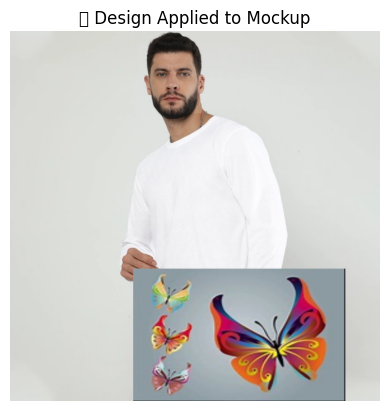

✅ Saved output: final_mockup.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image
import os

# Upload design
print("📤 Upload your design (e.g., butterfly)")
design_upload = files.upload()
design_path = next(iter(design_upload))

# Upload mockup
print("📤 Upload your mockup image (e.g., shirt or croptop)")
mockup_upload = files.upload()
mockup_path = next(iter(mockup_upload))

# --- Helper Functions ---

def load_image(path):
    img = cv2.imread(path)
    if img is None:
        raise ValueError(f"Couldn't load image from: {path}")
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def auto_warp(design, mockup):
    gray = cv2.cvtColor(mockup, cv2.COLOR_RGB2GRAY)
    _, mask = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)

    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        return None, None

    cnt = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(cnt)

    h_design, w_design = design.shape[:2]
    src_pts = np.float32([[0, 0], [0, h_design], [w_design, h_design], [w_design, 0]])
    dst_pts = np.float32([[x, y], [x, y + h], [x + w, y + h], [x + w, y]])

    M = cv2.getPerspectiveTransform(src_pts, dst_pts)
    warped = cv2.warpPerspective(design, M, (mockup.shape[1], mockup.shape[0]))

    # Create mask
    mask = np.zeros_like(mockup)
    cv2.fillConvexPoly(mask, dst_pts.astype(int), (255, 255, 255))
    mask = cv2.cvtColor(mask, cv2.COLOR_RGB2GRAY)

    return warped, mask

def apply_design(design_path, mockup_path):
    design = load_image(design_path)
    mockup = load_image(mockup_path)

    warped, mask = auto_warp(design, mockup)
    if warped is None:
        print("❌ Couldn't detect garment area.")
        return None

    inv_mask = cv2.bitwise_not(mask)
    background = cv2.bitwise_and(mockup, mockup, mask=inv_mask)
    foreground = cv2.bitwise_and(warped, warped, mask=mask)
    result = cv2.add(foreground, background)
    return result

# --- Execute ---

result = apply_design(design_path, mockup_path)

if result is not None:
    plt.imshow(result)
    plt.axis('off')
    plt.title("👕 Design Applied to Mockup")
    plt.show()

    output_path = "final_mockup.jpg"
    Image.fromarray(result).save(output_path)
    print("✅ Saved output:", output_path)
    files.download(output_path)


📤 Upload your design (e.g., butterfly)


Saving butterfly.jpg to butterfly (4).jpg
📤 Upload your mockup image (e.g., shirt)


Saving shirt to shirt (1)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


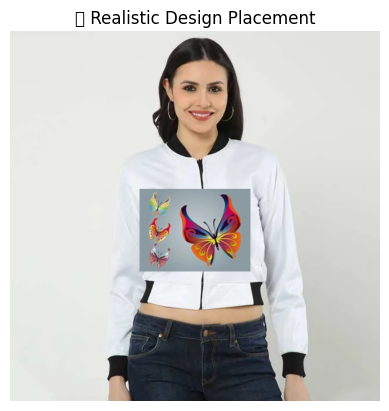

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image

# Upload design
print("📤 Upload your design (e.g., butterfly)")
design_upload = files.upload()
design_path = next(iter(design_upload))

# Upload mockup
print("📤 Upload your mockup image (e.g., shirt)")
mockup_upload = files.upload()
mockup_path = next(iter(mockup_upload))

# Load images
def load_image(path):
    img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
    if img is None:
        raise ValueError(f"Couldn't load image from {path}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

mockup = load_image(mockup_path)
design = load_image(design_path)

# Resize design to smaller patch
mockup_h, mockup_w = mockup.shape[:2]
target_width = int(mockup_w * 0.3)
aspect_ratio = design.shape[0] / design.shape[1]
design_resized = cv2.resize(design, (target_width, int(target_width * aspect_ratio)))

# Paste it at center chest area
x_offset = mockup_w // 2 - design_resized.shape[1] // 2
y_offset = mockup_h // 2 - design_resized.shape[0] // 3  # adjust chest height

# Create mask for blending
gray = cv2.cvtColor(design_resized, cv2.COLOR_RGB2GRAY)
_, alpha = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)
alpha = alpha.astype(float) / 255

for c in range(3):
    mockup[y_offset:y_offset+design_resized.shape[0], x_offset:x_offset+design_resized.shape[1], c] = \
        mockup[y_offset:y_offset+design_resized.shape[0], x_offset:x_offset+design_resized.shape[1], c] * (1 - alpha) + \
        design_resized[:, :, c] * alpha

# Show result
plt.imshow(mockup)
plt.axis('off')
plt.title("✅ Realistic Design Placement")
plt.show()

# Save result
output_path = "realistic_mockup.jpg"
Image.fromarray(mockup).save(output_path)
files.download(output_path)


📤 Upload design


Saving butterfly.jpg to butterfly (6).jpg
📤 Upload clothing mockup


Saving shorts to shorts (1)


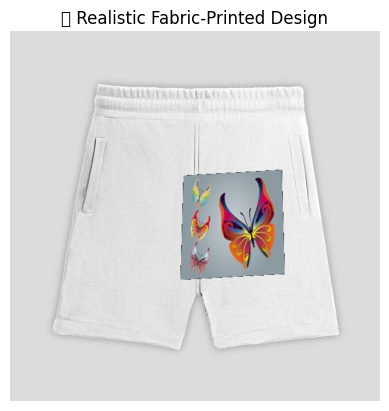

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files
from PIL import Image

# Upload images
print("📤 Upload design")
design_upload = files.upload()
design_path = next(iter(design_upload))

print("📤 Upload clothing mockup")
mockup_upload = files.upload()
mockup_path = next(iter(mockup_upload))

# Load design and mockup
design = cv2.imread(design_path)
mockup = cv2.imread(mockup_path)
design = cv2.cvtColor(design, cv2.COLOR_BGR2RGB)
mockup = cv2.cvtColor(mockup, cv2.COLOR_BGR2RGB)

# Resize design if needed
design = cv2.resize(design, (250, 250))  # Custom size

# Define 4 points on the design (source)
h, w = design.shape[:2]
pts_src = np.float32([[0, 0], [w, 0], [w, h], [0, h]])

# Manually choose where it should go on mockup (destination)
pts_dst = np.float32([
    [300, 250],  # top-left
    [470, 240],  # top-right
    [475, 420],  # bottom-right
    [295, 430]   # bottom-left
])

# Perspective warp
M = cv2.getPerspectiveTransform(pts_src, pts_dst)
warped_design = cv2.warpPerspective(design, M, (mockup.shape[1], mockup.shape[0]))

# Convert warped design to grayscale and create mask
gray = cv2.cvtColor(warped_design, cv2.COLOR_RGB2GRAY)
_, mask = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)
inv_mask = cv2.bitwise_not(mask)

# Extract shadows from original mockup using edge map
shadow = cv2.GaussianBlur(mockup, (21, 21), 0)
shadow = cv2.subtract(mockup, shadow)
shadow = cv2.cvtColor(shadow, cv2.COLOR_RGB2GRAY)
shadow = cv2.merge([shadow, shadow, shadow])

# Blend shadows
enhanced = cv2.addWeighted(mockup, 1.0, shadow, 0.5, 0)

# Apply design with texture simulation
background = cv2.bitwise_and(enhanced, enhanced, mask=inv_mask)
foreground = cv2.bitwise_and(warped_design, warped_design, mask=mask)
final_result = cv2.add(background, foreground)

# Show result
plt.imshow(final_result)
plt.axis('off')
plt.title("🎯 Realistic Fabric-Printed Design")
plt.show()

# Save result
output_path = "realistic_printed_mockup.jpg"
Image.fromarray(final_result).save(output_path)
files.download(output_path)


📤 Upload your design (e.g., butterfly art)


Saving butterfly1.jpg to butterfly1.jpg
📤 Upload your mockup image (e.g., shirt, hoodie)


Saving tshirt to tshirt (2)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129509 (\N{COAT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


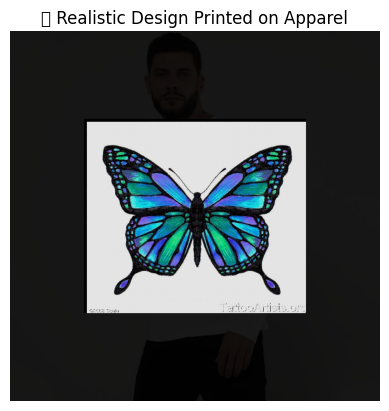

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
!pip install opencv-python-headless

import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files

# --- Upload Inputs ---
print("📤 Upload your design (e.g., butterfly art)")
design_file = files.upload()
design_path = next(iter(design_file))

print("📤 Upload your mockup image (e.g., shirt, hoodie)")
mockup_file = files.upload()
mockup_path = next(iter(mockup_file))


# --- Utility Functions ---
def load_image(path):
    img = cv2.imread(path)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


def create_pseudo_depth(gray_img):
    # Simulate a depth/fabric displacement map
    blur = cv2.GaussianBlur(gray_img, (51, 51), 0)
    laplacian = cv2.Laplacian(blur, cv2.CV_64F)
    laplacian = cv2.convertScaleAbs(laplacian)
    return laplacian


def apply_displacement_map(image, displacement_map, strength=10):
    h, w = displacement_map.shape
    displacement_map = cv2.resize(displacement_map, (w, h))

    # Generate displacement fields
    dx = (displacement_map.astype(np.float32) - 128) / 128 * strength
    dy = (displacement_map.astype(np.float32) - 128) / 128 * strength

    # Meshgrid for remapping
    map_y, map_x = np.meshgrid(np.arange(h), np.arange(w), indexing='ij')
    map_x = np.clip(map_x + dx, 0, w - 1).astype(np.float32)
    map_y = np.clip(map_y + dy, 0, h - 1).astype(np.float32)

    return cv2.remap(image, map_x, map_y, interpolation=cv2.INTER_LINEAR)


def extract_shadows(mockup_gray):
    # Extract shadow map
    shadows = cv2.equalizeHist(mockup_gray)
    shadows = cv2.GaussianBlur(shadows, (31, 31), 0)
    return shadows


def warp_design_to_center(design, mockup, scale=0.6):
    h_m, w_m = mockup.shape[:2]
    h_d, w_d = design.shape[:2]

    # Resize design to a portion of mockup
    new_w = int(w_m * scale)
    new_h = int(h_d * new_w / w_d)
    design_resized = cv2.resize(design, (new_w, new_h))

    # Simple central position
    x_offset = (w_m - new_w) // 2
    y_offset = (h_m - new_h) // 2

    warped = np.zeros_like(mockup)
    warped[y_offset:y_offset+new_h, x_offset:x_offset+new_w] = design_resized

    mask = np.zeros(mockup.shape[:2], dtype=np.uint8)
    mask[y_offset:y_offset+new_h, x_offset:x_offset+new_w] = 255

    return warped, mask


def blend_with_mockup(warped, mockup, mask, shadows, alpha=0.85):
    # Add shadows for realism
    shadow_factor = cv2.normalize(shadows, None, 0.7, 1.0, cv2.NORM_MINMAX)
    shadow_factor = np.repeat(shadow_factor[:, :, np.newaxis], 3, axis=2)

    warped_shadowed = (warped * shadow_factor).astype(np.uint8)

    # Blend
    inv_mask = cv2.bitwise_not(mask)
    background = cv2.bitwise_and(mockup, mockup, mask=inv_mask)
    foreground = cv2.bitwise_and(warped_shadowed, warped_shadowed, mask=mask)

    return cv2.addWeighted(background, 1 - alpha, foreground, alpha, 0)


# --- Run Pipeline ---
mockup = load_image(mockup_path)
design = load_image(design_path)

mockup_gray = cv2.cvtColor(mockup, cv2.COLOR_RGB2GRAY)
shadows = extract_shadows(mockup_gray)

# Step 1: Warp design (centered for now)
warped, mask = warp_design_to_center(design, mockup)

# Step 2: Displace design based on fabric
pseudo_depth = create_pseudo_depth(mockup_gray)
warped_displaced = apply_displacement_map(warped, pseudo_depth, strength=5)

# Step 3: Blend all together
result = blend_with_mockup(warped_displaced, mockup, mask, shadows, alpha=0.9)

# --- Show Output ---
plt.imshow(result)
plt.axis('off')
plt.title("🧥 Realistic Design Printed on Apparel")
plt.show()

# Save and Download
out_path = "realistic_mockup_result.png"
Image.fromarray(result).save(out_path)
files.download(out_path)


📤 Upload your DESIGN image


Saving butterfly1.jpg to butterfly1 (1).jpg
📤 Upload your MOCKUP image


Saving shirt to shirt (3)


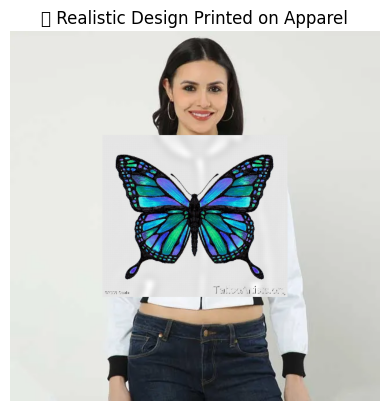

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
import cv2
import numpy as np
from PIL import Image
from google.colab import files
import matplotlib.pyplot as plt

# Step 1: Upload images
print("📤 Upload your DESIGN image")
design_upload = files.upload()
design_path = next(iter(design_upload))

print("📤 Upload your MOCKUP image")
mockup_upload = files.upload()
mockup_path = next(iter(mockup_upload))

# Step 2: Load images
design = cv2.imread(design_path)
design = cv2.cvtColor(design, cv2.COLOR_BGR2RGB)

mockup = cv2.imread(mockup_path)
mockup = cv2.cvtColor(mockup, cv2.COLOR_BGR2RGB)
mockup_gray = cv2.cvtColor(mockup, cv2.COLOR_RGB2GRAY)

# Step 3: Resize design
design_h, design_w = design.shape[:2]
mockup_h, mockup_w = mockup.shape[:2]

scale_factor = 0.5
new_width = int(mockup_w * scale_factor)
new_height = int(new_width * design_h / design_w)
design_resized = cv2.resize(design, (new_width, new_height))

# Step 4: Place design centered on shirt
x_offset = (mockup_w - new_width) // 2
y_offset = (mockup_h - new_height) // 2

warped = np.zeros_like(mockup)
warped[y_offset:y_offset+new_height, x_offset:x_offset+new_width] = design_resized

# Step 5: Create mask
mask = np.zeros(mockup.shape[:2], dtype=np.uint8)
mask[y_offset:y_offset+new_height, x_offset:x_offset+new_width] = 255

# Step 6: Simulate depth and shadow
depth_map = cv2.Laplacian(mockup_gray, cv2.CV_32F)
depth_map = cv2.GaussianBlur(depth_map, (41, 41), 0)
depth_map = cv2.normalize(depth_map, None, 0.85, 1.0, cv2.NORM_MINMAX)
depth_map = np.repeat(depth_map[:, :, np.newaxis], 3, axis=2)

# Apply depth map
warped = (warped.astype(np.float32) * depth_map).astype(np.uint8)

# Step 7: Blend design into shirt
background = cv2.bitwise_and(mockup, mockup, mask=cv2.bitwise_not(mask))
combined = cv2.add(background, cv2.bitwise_and(warped, warped, mask=mask))

# Step 8: Display
plt.imshow(combined)
plt.axis('off')
plt.title("🧥 Realistic Design Printed on Apparel")
plt.show()

# Step 9: Save & download
output_path = "realistic_result.png"
Image.fromarray(combined).save(output_path)
files.download(output_path)


In [10]:
import cv2
import numpy as np

def load_images(design_path, mockup_path, depth_map_path):
    """
    Load images from disk.
    design_path: path to the design image
    mockup_path: path to the blank mockup image
    depth_map_path: path to grayscale depth map for fabric folds
    """
    design = cv2.imread(design_path, cv2.IMREAD_UNCHANGED)
    mockup = cv2.imread(mockup_path, cv2.IMREAD_COLOR)
    depth_map = cv2.imread(depth_map_path, cv2.IMREAD_GRAYSCALE)

    if design is None:
        raise FileNotFoundError(f"Design image not found: {design_path}")
    if mockup is None:
        raise FileNotFoundError(f"Mockup image not found: {mockup_path}")
    if depth_map is None:
        raise FileNotFoundError(f"Depth map image not found: {depth_map_path}")

    return design, mockup, depth_map

def perspective_warp(design, pts_src, pts_dst, dst_size):
    """
    Applies perspective transform to warp the design onto the mockup area.
    pts_src: source points on design (4x2 array)
    pts_dst: destination points on mockup (4x2 array)
    dst_size: (width, height) of output warped image
    """
    matrix = cv2.getPerspectiveTransform(np.float32(pts_src), np.float32(pts_dst))
    warped = cv2.warpPerspective(design, matrix, dst_size, flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT, borderValue=(0,0,0,0))
    return warped

def apply_fabric_texture(warped_design, depth_map, intensity=5):
    """
    Uses the depth map to distort the warped design image simulating fabric folds.
    intensity: displacement multiplier; tweak for effect strength
    """
    # Convert depth map to displacement vectors (optical flow-like)
    # Use gradients of depth map to simulate displacement
    depth_float = depth_map.astype(np.float32) / 255.0

    # Calculate gradient
    grad_x = cv2.Sobel(depth_float, cv2.CV_32F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(depth_float, cv2.CV_32F, 0, 1, ksize=3)

    # Create displacement map (dx, dy)
    map_x, map_y = np.meshgrid(np.arange(depth_map.shape[1]), np.arange(depth_map.shape[0]))
    map_x = map_x.astype(np.float32) + grad_x * intensity
    map_y = map_y.astype(np.float32) + grad_y * intensity

    # Remap the warped design
    distorted = cv2.remap(warped_design, map_x, map_y, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT)

    return distorted

def extract_shadows(mockup):
    """
    Extract shadow areas from the mockup image to preserve realism.
    Returns a shadow mask as grayscale image where shadows are white.
    """
    # Convert to grayscale
    gray = cv2.cvtColor(mockup, cv2.COLOR_BGR2GRAY)

    # Invert image to highlight darker shadows as bright areas
    inverted = cv2.bitwise_not(gray)

    # Threshold to isolate shadows (tune threshold for actual images)
    _, shadow_mask = cv2.threshold(inverted, 150, 255, cv2.THRESH_BINARY)

    # Optional: apply slight blur to soften mask edges
    shadow_mask = cv2.GaussianBlur(shadow_mask, (7,7), 0)

    return shadow_mask

def blend_final(mockup, distorted_design, shadow_mask, alpha=0.85):
    """
    Blend the distorted design onto the mockup using shadow mask for realism.
    alpha: transparency level of design over mockup
    """
    # Ensure distorted_design has 4 channels (with alpha), convert if needed
    if distorted_design.shape[2] == 3:
        # Add opaque alpha channel if missing
        alpha_channel = np.ones((distorted_design.shape[0], distorted_design.shape[1]), dtype=np.uint8) * 255
        distorted_design = np.dstack([distorted_design, alpha_channel])
    b,g,r,a = cv2.split(distorted_design)

    # Prepare overlay for blending: convert design RGB to BGR (already BGR in cv2)
    design_rgb = cv2.merge((b,g,r))

    # Resize shadow_mask to match design if needed
    if shadow_mask.shape != design_rgb.shape[:2]:
        shadow_mask_resized = cv2.resize(shadow_mask, (design_rgb.shape[1], design_rgb.shape[0]), interpolation=cv2.INTER_LINEAR)
    else:
        shadow_mask_resized = shadow_mask

    # Normalize shadow mask from 0-255 to 0-1 (invert to create shadow weight)
    shadow_alpha = (shadow_mask_resized.astype(np.float32) / 255.0)
    shadow_alpha = cv2.normalize(shadow_alpha, None, alpha=0.4, beta=0.9, norm_type=cv2.NORM_MINMAX)  # Shadows not fully opaque

    # Blend design and mockup in the design area only (where alpha channel > 0)
    h, w = design_rgb.shape[:2]

    # Crop mockup region where the design will be placed based on destination size
    mockup_crop = mockup[0:h, 0:w, :].astype(np.float32) / 255.0
    design_rgb_f = design_rgb.astype(np.float32) / 255.0
    alpha_f = (a.astype(np.float32) / 255.0) * alpha

    # Add shadow weighting to alpha channel to preserve shadows
    shadow_alpha = shadow_alpha[..., np.newaxis]

    combined_alpha = alpha_f * (1 - shadow_alpha) + shadow_alpha

    blended = mockup_crop * (1 - combined_alpha) + design_rgb_f * combined_alpha

    # Composite with mockup base
    final = mockup.copy().astype(np.float32) / 255.0
    final[0:h, 0:w, :] = blended

    final = np.clip(final * 255, 0, 255).astype(np.uint8)
    return final

def main():
    import argparse

    parser = argparse.ArgumentParser(description='Print design on fabric mockup with perspective and texture distortion.')
    parser.add_argument('--design', required=True, help='Path to design image (with alpha preferred)')
    parser.add_argument('--mockup', required=True, help='Path to blank fabric mockup image')
    parser.add_argument('--depth', required=True, help='Path to depth map image (grayscale)')
    parser.add_argument('--output', default='final_output.png', help='Output image path')

    args = parser.parse_args()

    # Load images
    design, mockup, depth_map = load_images(args.design, args.mockup, args.depth)

    # Define src points (corners in design image) in pixel coordinates
    h_d, w_d = design.shape[0:2]
    pts_src = np.array([[0,0], [w_d,0], [w_d,h_d], [0,h_d]], dtype=np.float32)

    # Manually define destination points on mockup for perspective transform
    # You might want to adjust these coordinates for your mockup image
    h_m, w_m = mockup.shape[0:2]
    margin_x, margin_y = 100, 150  # example offset on mockup
    pts_dst = np.array([
        [margin_x, margin_y],                # Top-left on mockup
        [w_m - margin_x, margin_y + 20],    # Top-right (slight vertical offset)
        [w_m - margin_x - 40, h_m - margin_y],  # Bottom-right
        [margin_x + 60, h_m - margin_y - 20]     # Bottom-left
    ], dtype=np.float32)

    # Warp design onto mockup perspective
    dst_size = (w_m, h_m)
    warped_design = perspective_warp(design, pts_src, pts_dst, dst_size)

    # Resize depth map to mockup size for displacement matching
    depth_resized = cv2.resize(depth_map, (w_m, h_m), interpolation=cv2.INTER_LINEAR)

    # Apply fabric texture distortion via depth map displacement
    distorted_design = apply_fabric_texture(warped_design, depth_resized, intensity=7)

    # Extract shadows from mockup
    shadow_mask = extract_shadows(mockup)

    # Blend distorted design with mockup and shadows
    final_img = blend_final(mockup, distorted_design, shadow_mask, alpha=0.85)

    # Save and show
    cv2.imwrite(args.output, final_img)
    print(f"Final blended image saved to: {args.output}")

    # Show windows for quick preview (optional)
    cv2.imshow("Mockup", mockup)
    cv2.imshow("Warped Design", warped_design)
    cv2.imshow("Distorted Design", distorted_design)
    cv2.imshow("Shadow Mask", shadow_mask)
    cv2.imshow("Final Output", final_img)
    print("Press any key on image windows to exit.")
    cv2.waitKey(0)
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()



usage: colab_kernel_launcher.py [-h] --design DESIGN --mockup MOCKUP --depth
                                DEPTH [--output OUTPUT]
colab_kernel_launcher.py: error: the following arguments are required: --design, --mockup, --depth


SystemExit: 2

/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
